In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

In [52]:
targetdf = pd.read_csv('targettestsample.csv')
sourcedf = pd.read_csv('testsourcesample.csv')

In [53]:
targetdf=targetdf.drop(columns=['0'])
sourcedf=sourcedf.drop(columns=['0'])

In [13]:
x = torch.zeros(2)
x = x + torch.rand_like(x)
x

tensor([0.6002, 0.1975])

In [55]:
targetdf = (targetdf.reset_index(drop=True))
targetdf

,0.784276,-1.006394,-0.992537,0.157025,-1.308876,-1.188246,-0.737561,0.385701,0.253324,-0.912334,...,0.465302,-0.751814,-1.419370,-1.346511,-0.869973,-0.607799,0.071405,-0.301379,-0.007103,-1.127762
0,-0.395966,-1.672132,-0.722501,-0.450074,-1.202647,-0.127915,-0.316034,-2.168710,-2.605054,-0.291542,...,0.633215,-1.057432,-0.653161,-0.652441,-1.578731,-0.692547,-1.574482,-0.946533,-2.551918,-0.399705
1,0.951024,-0.621096,0.157173,-1.376207,-0.279764,0.277379,0.109631,-0.090563,0.025149,-0.352331,...,0.834908,0.201863,-0.465581,-0.047393,0.143285,0.346950,-0.504558,0.234942,-1.190001,0.528518
2,2.258079,-0.270195,0.895395,1.702417,1.009905,-0.292348,-1.293918,-0.241381,1.886152,-0.654999,...,-0.158325,0.509609,-0.600975,1.086805,1.745577,1.398795,-0.553002,2.302458,1.039135,0.318085
3,-1.245210,1.563240,-0.242101,-0.498041,-0.478238,-0.183909,-0.635219,0.874110,-0.843463,-0.428561,...,-1.269759,-0.233106,-0.614500,0.102403,-1.463411,-0.277689,-0.219022,0.115902,0.858828,2.318685
4,-0.960206,1.159436,-1.180942,-0.174229,-0.051478,0.127845,-0.813421,-1.304651,-0.677965,-0.392231,...,-0.306506,-0.684106,0.057386,-1.079688,-0.551622,-1.821817,0.014270,-0.250184,-2.383487,-1.396658
5,0.408922,0.130250,-0.104462,0.661469,1.042578,-1.329486,1.002679,0.492637,-0.587231,0.632752,...,1.050100,0.483719,0.819788,-0.488387,1.831132,-0.909785,1.321721,-0.630554,-0.187155,0.949276
6,1.474167,0.270233,0.133318,-0.164464,1.578191,0.380887,0.857173,0.298652,0.758520,0.723653,...,-0.326462,-0.405756,1.667234,0.531407,1.076930,-0.902177,0.724828,1.978882,0.430696,-0.079576
7,-0.455893,-1.051848,0.040503,0.571103,-1.421647,-0.960956,-1.227609,-1.378879,1.221073,-0.935247,...,-1.393002,-1.330118,0.561007,-1.133511,-2.384957,-0.454770,-0.118431,1.408150,-2.550726,-1.188563
8,-0.421031,1.608698,1.547693,0.071006,1.566049,-0.051779,-0.053590,0.255461,-0.701614,0.803644,...,-0.118034,0.689094,2.086797,0.860887,0.538252,0.629510,0.325843,1.176223,0.063638,-0.892935


In [56]:
targetdf.loc[-1] = targetdf.columns 
targetdf.index = targetdf.index + 1  # Shift the index
targetdf = targetdf.sort_index() # Insert the old column names as the first row
targetdf.columns = range(targetdf.shape[1])

In [57]:
targetdf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.784276,-1.006394,-0.992537,0.157025,-1.308876,-1.188246,-0.737561,0.385701,0.253324,-0.912334,...,0.465302,-0.751814,-1.419370,-1.346511,-0.869973,-0.607799,0.071405,-0.301379,-0.007103,-1.127762
1,-0.395966,-1.672132,-0.722501,-0.450074,-1.202647,-0.127915,-0.316034,-2.16871,-2.605054,-0.291542,...,0.633215,-1.057432,-0.653161,-0.652441,-1.578731,-0.692547,-1.574482,-0.946533,-2.551918,-0.399705
2,0.951024,-0.621096,0.157173,-1.376207,-0.279764,0.277379,0.109631,-0.090563,0.025149,-0.352331,...,0.834908,0.201863,-0.465581,-0.047393,0.143285,0.34695,-0.504558,0.234942,-1.190001,0.528518
3,2.258079,-0.270195,0.895395,1.702417,1.009905,-0.292348,-1.293918,-0.241381,1.886152,-0.654999,...,-0.158325,0.509609,-0.600975,1.086805,1.745577,1.398795,-0.553002,2.302458,1.039135,0.318085
4,-1.24521,1.56324,-0.242101,-0.498041,-0.478238,-0.183909,-0.635219,0.87411,-0.843463,-0.428561,...,-1.269759,-0.233106,-0.6145,0.102403,-1.463411,-0.277689,-0.219022,0.115902,0.858828,2.318685
5,-0.960206,1.159436,-1.180942,-0.174229,-0.051478,0.127845,-0.813421,-1.304651,-0.677965,-0.392231,...,-0.306506,-0.684106,0.057386,-1.079688,-0.551622,-1.821817,0.01427,-0.250184,-2.383487,-1.396658
6,0.408922,0.13025,-0.104462,0.661469,1.042578,-1.329486,1.002679,0.492637,-0.587231,0.632752,...,1.0501,0.483719,0.819788,-0.488387,1.831132,-0.909785,1.321721,-0.630554,-0.187155,0.949276
7,1.474167,0.270233,0.133318,-0.164464,1.578191,0.380887,0.857173,0.298652,0.75852,0.723653,...,-0.326462,-0.405756,1.667234,0.531407,1.07693,-0.902177,0.724828,1.978882,0.430696,-0.079576
8,-0.455893,-1.051848,0.040503,0.571103,-1.421647,-0.960956,-1.227609,-1.378879,1.221073,-0.935247,...,-1.393002,-1.330118,0.561007,-1.133511,-2.384957,-0.45477,-0.118431,1.40815,-2.550726,-1.188563
9,-0.421031,1.608698,1.547693,0.071006,1.566049,-0.051779,-0.05359,0.255461,-0.701614,0.803644,...,-0.118034,0.689094,2.086797,0.860887,0.538252,0.62951,0.325843,1.176223,0.063638,-0.892935


In [58]:
sourcedf = (sourcedf.reset_index(drop=True))
sourcedf.loc[-1] = sourcedf.columns 
sourcedf.index = sourcedf.index + 1  # Shift the index
sourcedf = sourcedf.sort_index() # Insert the old column names as the first row
sourcedf.columns = range(sourcedf.shape[1])

In [70]:
df = pd.DataFrame({
    'X': sourcedf.stack(),
    'Y': targetdf.stack()
})

X          Y
0 0    0.784276   0.784276
  1   -1.006394  -1.006394
  2   -0.992537  -0.992537
  3    0.157025   0.157025
  4   -1.308876  -1.308876
...         ...        ...
9 95    0.62951    0.62951
  96   0.325843   0.325843
  97   1.176223   1.176223
  98   0.063638   0.063638
  99  -0.892935  -0.892935

[1000 rows x 2 columns]

TypeError: 'value' must be an instance of str or bytes, not a float

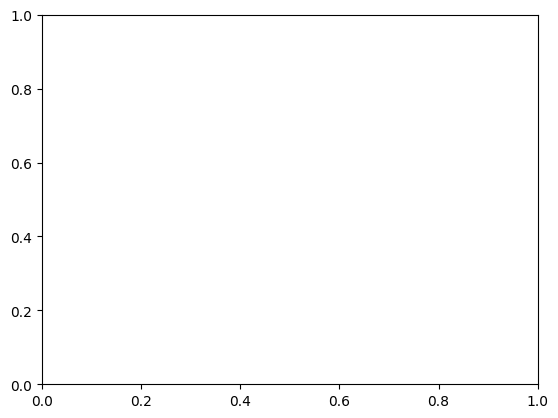

In [73]:
plt.scatter(df['X'], df['Y'], alpha=0.6)


In [37]:
mean = torch.zeros(2)
cov = torch.eye(2)
torch.distributions.MultivariateNormal(mean,cov).sample()

tensor([0.3014, 1.1933])

In [33]:
y = torch.randperm(10)
y // 2

tensor([3, 0, 1, 2, 4, 2, 0, 1, 4, 3])

In [24]:
len(x)

10